In [2]:
#Step 1: Load your engineered dataset
import pandas as pd

df = pd.read_csv("../data/processed/feature_ready_loans.csv")
df.shape


(32582, 21)

In [3]:
# Step 2: Define X and y, then split into train/test
from sklearn.model_selection import train_test_split

X = df.drop("loan_default", axis=1)
y = df["loan_default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
# Step 3: Train Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

📊 Classification Report:

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.88      5149
         1.0       0.68      0.04      0.07      1368

    accuracy                           0.79      6517
   macro avg       0.74      0.52      0.48      6517
weighted avg       0.77      0.79      0.71      6517

🧾 Confusion Matrix:


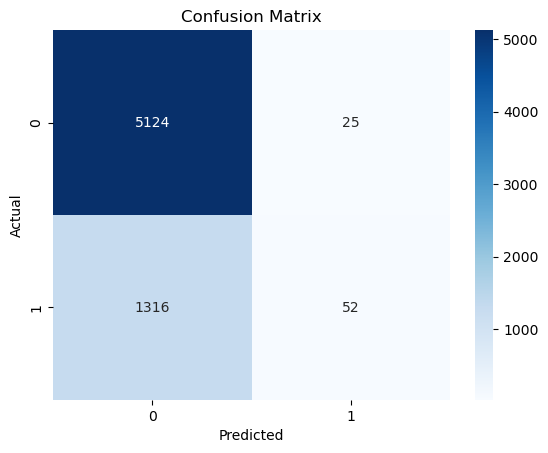

In [5]:
# Step 4: Evaluate the Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🧾 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


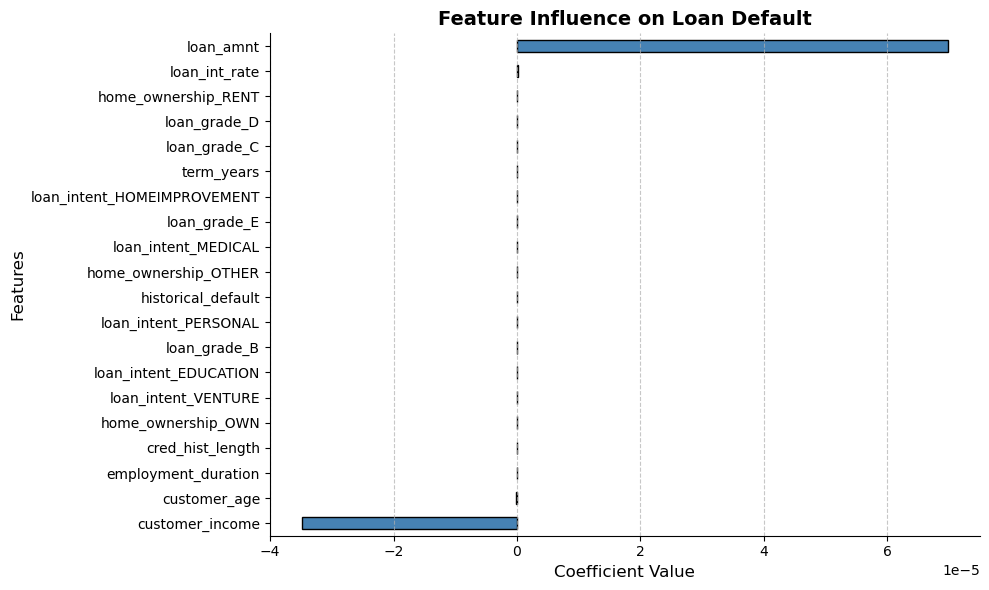

In [8]:

import matplotlib.pyplot as plt

# Prepare coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients = coefficients.sort_values()

# Plot
plt.figure(figsize=(10, 6))
ax = coefficients.plot(kind='barh', color='steelblue', edgecolor='black')

# Title and labels
plt.title("Feature Influence on Loan Default", fontsize=14, fontweight='bold')
plt.xlabel("Coefficient Value", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
